In [1]:
"""
@author: albertigno

"""

from MyLargeDataset import *
from snn_models_with_delay import *

import torch, time, os

import torch.nn as nn
import torch.nn.functional as F

import networkx as nx

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

print(torch.cuda.is_available())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print (device)

/Users/alberto/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


False
cpu


In [2]:
# dummy dataset

from PIL import Image, ImageDraw, ImageFont 
img = Image.new('RGB', (100, 25), color = (255, 255, 255))
font = ImageFont.truetype("arial.ttf", 20)
d = ImageDraw.Draw(img)
d.text((1,1), "Spiking NNs", fill=(0,0,0), font=font)
img.save('pil_text.png')

In [3]:
import numpy as np

im= 1.0*(np.asarray(Image.open('pil_text.png')) > 128)
#img = torch.from_numpy(i).permute(2,1,0)
#img.shape

In [4]:
thresh = 0.3
decay = 0.3
batch_size = 1
learning_rate = 1e-4
time_window = 50 # shd

dataset_path = r'./../../datasets'

best_acc = 0
acc_record = list([])

In [5]:
print(torch.cuda.is_available())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print (device)

#test_path = 'pil_text.png'
dataset_path = r'./../../datasets'

test_path = dataset_path+'/shd_digits/shd_test.h5'


print("loading test set...")
#test_dataset = MyDataset(test_path, 'dummy_numpy', time_window)

test_dataset = MyDataset(test_path, 'hd_digits', time_window)

#test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
#                                          batch_size=batch_size,
#                                          shuffle=False, drop_last=True)
#

False
cpu
loading test set...
torch.Size([2264, 50, 700])
torch.Size([2264])
num sample: 2264
torch.Size([2264, 50, 700]) torch.Size([2264, 20])


In [6]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False, drop_last=True)


In [7]:
#snn = RSNN_delay(d='custom_25_5', num_hidden=4, thresh=0.3, decay=0.3, batch_size=batch_size, win=time_window, device=device)
snn = RSNN_delay(d='shd', num_hidden=4, thresh=0.3, decay=0.3, batch_size=batch_size, win=time_window, device=device)

In [8]:
num_epochs = 50
    
snn.to(device)

delays = torch.Tensor([[0],[2],[5],[10]])

snn.d_ih.weight.data = torch.nn.Parameter(delays*torch.ones(snn.num_hidden, snn.num_input, device=snn.device)) 

criterion = nn.MSELoss()

#modelname = 'shd_rnn_{}.t7'.format(snn.num_hidden)

def lr_scheduler(optimizer, epoch, init_lr=0.1, lr_decay_epoch=100):
    """Decay learning rate by a factor of 0.1 every lr_decay_epoch epochs."""

    if epoch % lr_decay_epoch == 0 and epoch > 1:
        for param_group in optimizer.param_groups:
            param_group['lr'] = param_group['lr'] * 0.98

    return optimizer

optimizer = torch.optim.Adam(snn.parameters(), lr=learning_rate)

act_fun = ActFun.apply
#print(modelname)

In [9]:
for i, (images, labels) in enumerate(test_loader):

    snn.zero_grad()
    optimizer.zero_grad()

    images = images.float().to(device)
    outputs = snn(images)
    
    break


In [10]:
snn.d_ih.weight

Parameter containing:
tensor([[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 2.,  2.,  2.,  ...,  2.,  2.,  2.],
        [ 5.,  5.,  5.,  ...,  5.,  5.,  5.],
        [10., 10., 10.,  ..., 10., 10., 10.]], requires_grad=True)

In [11]:
all_spikes = np.array(snn.all_delayed_spikes.expand(snn.win,3,4,snn.num_input).permute(0,3,1,2))
all_counters = np.array(snn.all_counters.detach().expand(snn.win,3,4,snn.num_input).permute(0,3,1,2))


In [12]:
all_spikes.shape

(50, 700, 3, 4)

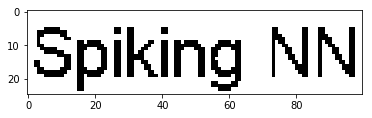

In [13]:
plt.imshow(im)

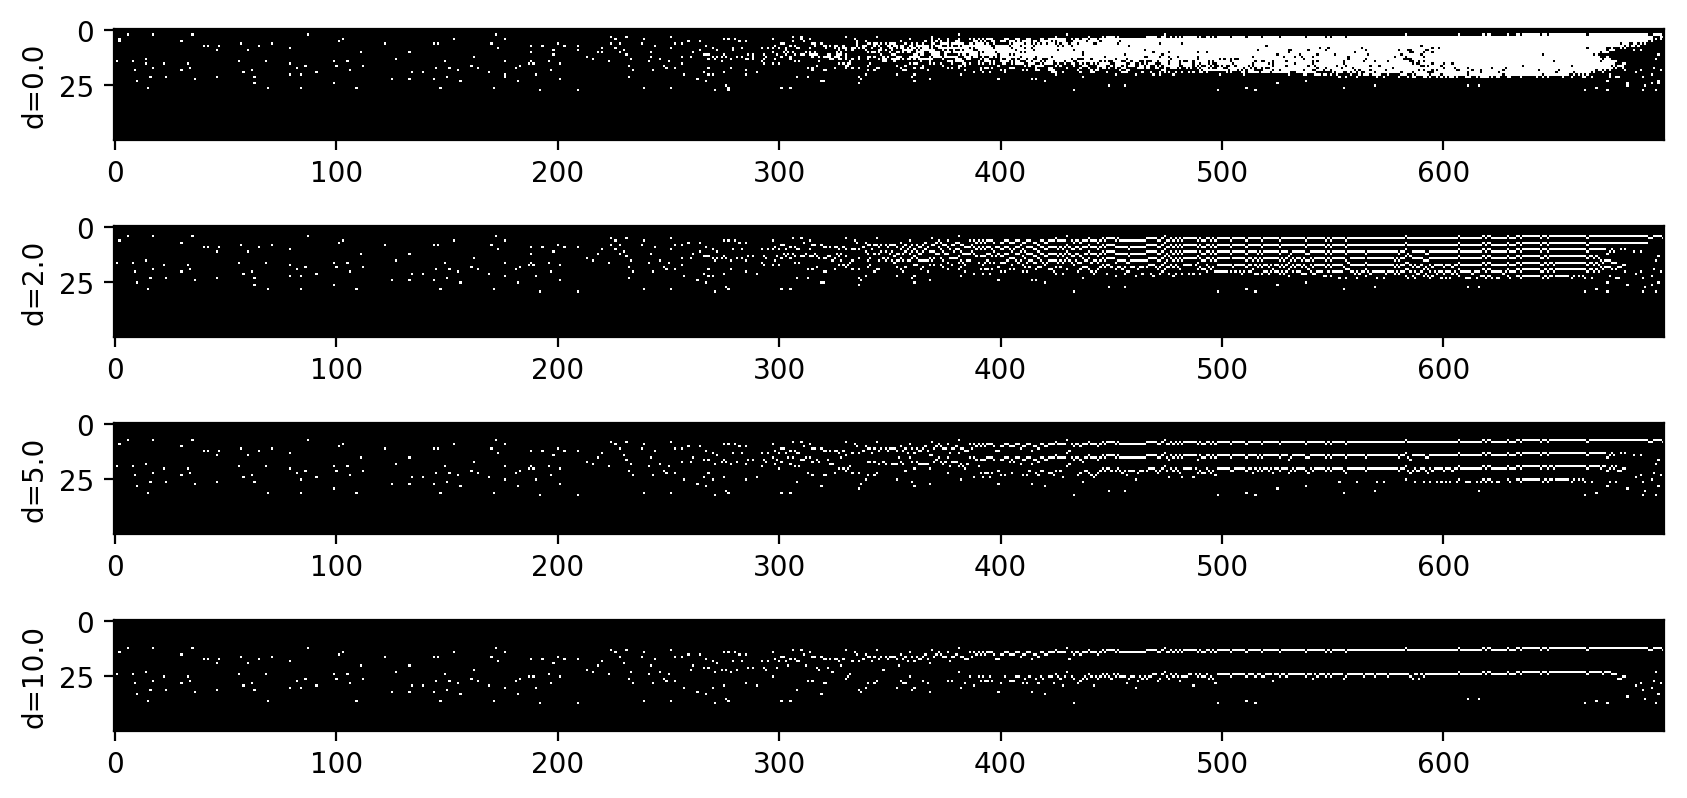

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5), dpi=200)
for k in range(4):
    plt.subplot(4,1,k+1)
    plt.imshow(all_spikes[:,:,:,k])
    plt.ylabel('d={}'.format(delays[k][0]))

In [15]:
str(delays[1][0])

'tensor(2.)'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


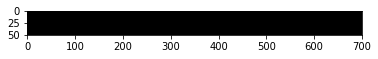

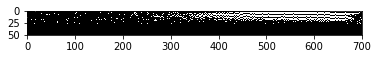

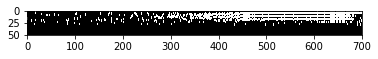

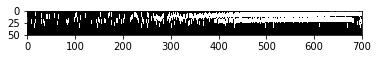

In [16]:
import matplotlib.pyplot as plt
for n in range(4):
    plt.figure()
    plt.imshow(all_counters[:,:,:,n])

In [17]:
all_counters.shape

(50, 700, 3, 4)

In [18]:
im.shape

(25, 100, 3)

In [19]:
im[10,:,0]

array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.])

In [20]:
n=1
print(all_spikes[10,:,0,1])
print(all_counters[10,:,0,1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.